# Никитин Александр Леонидович



![Снимок экрана 2023-07-19 в 18.32.59.png](<attachment:Снимок экрана 2023-07-19 в 18.32.59.png>)
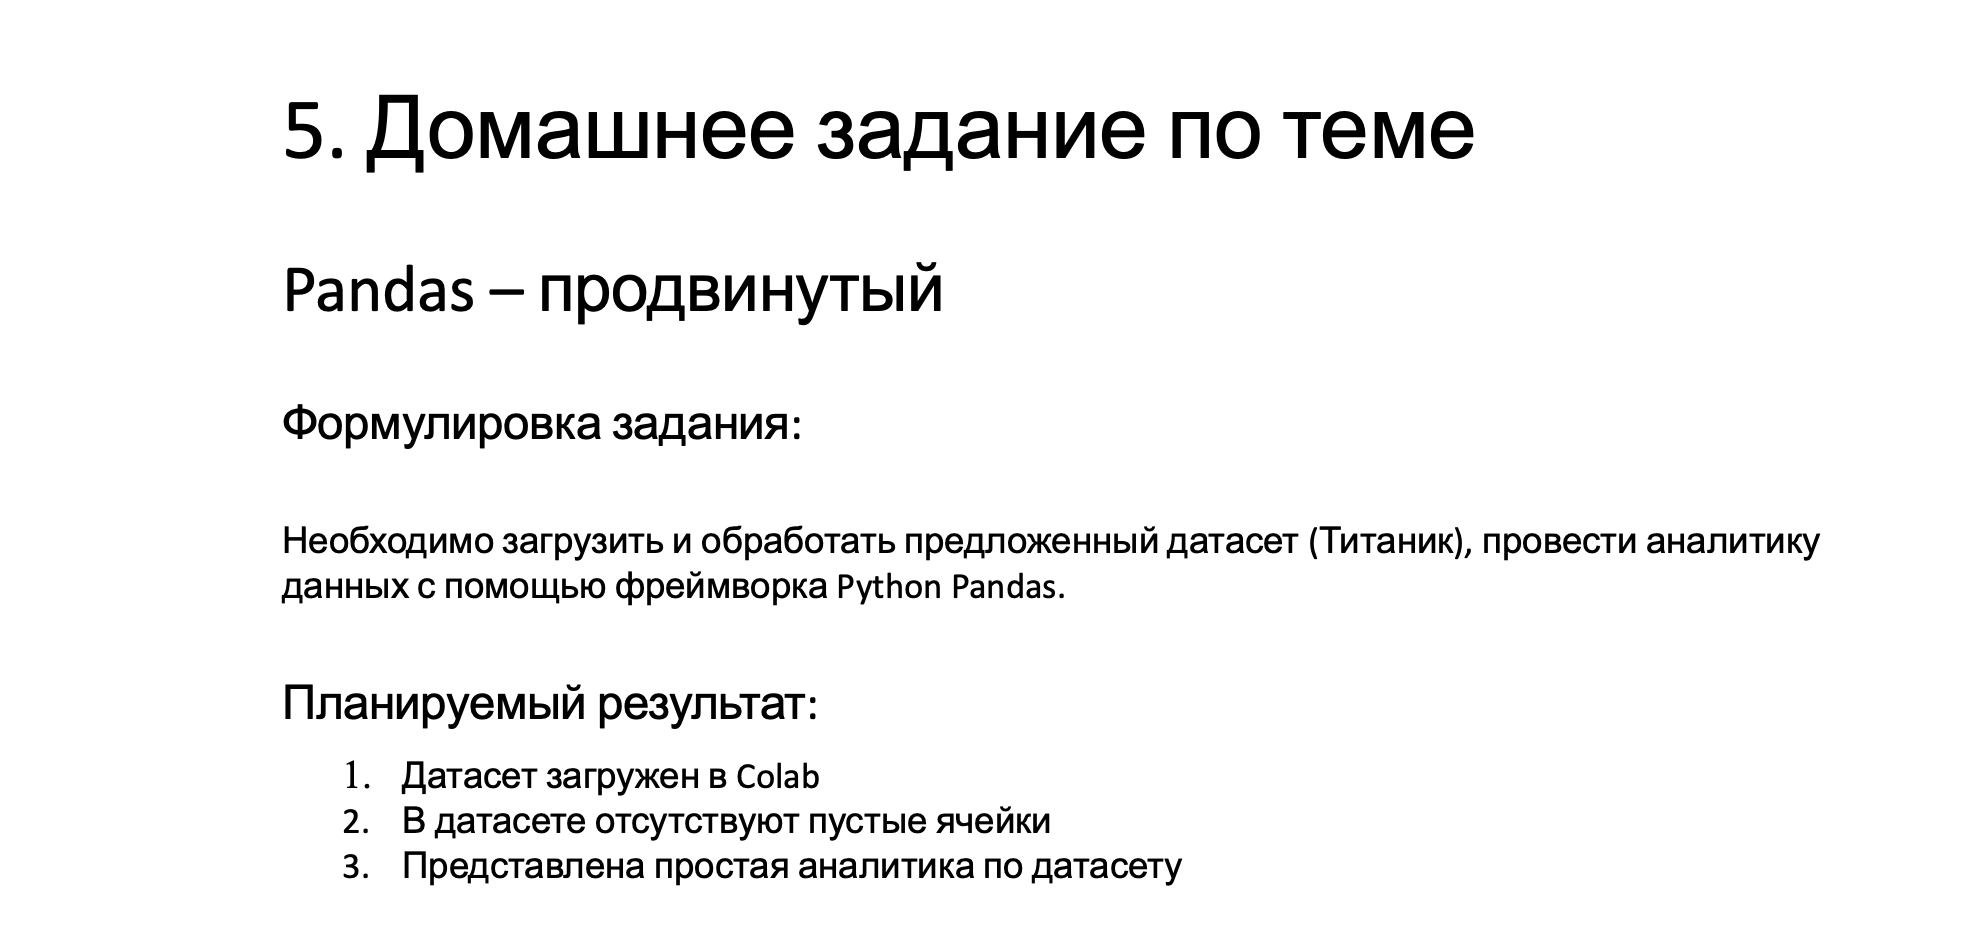

![Снимок экрана 2023-07-19 в 18.33.43.png](<attachment:Снимок экрана 2023-07-19 в 18.33.43.png>)
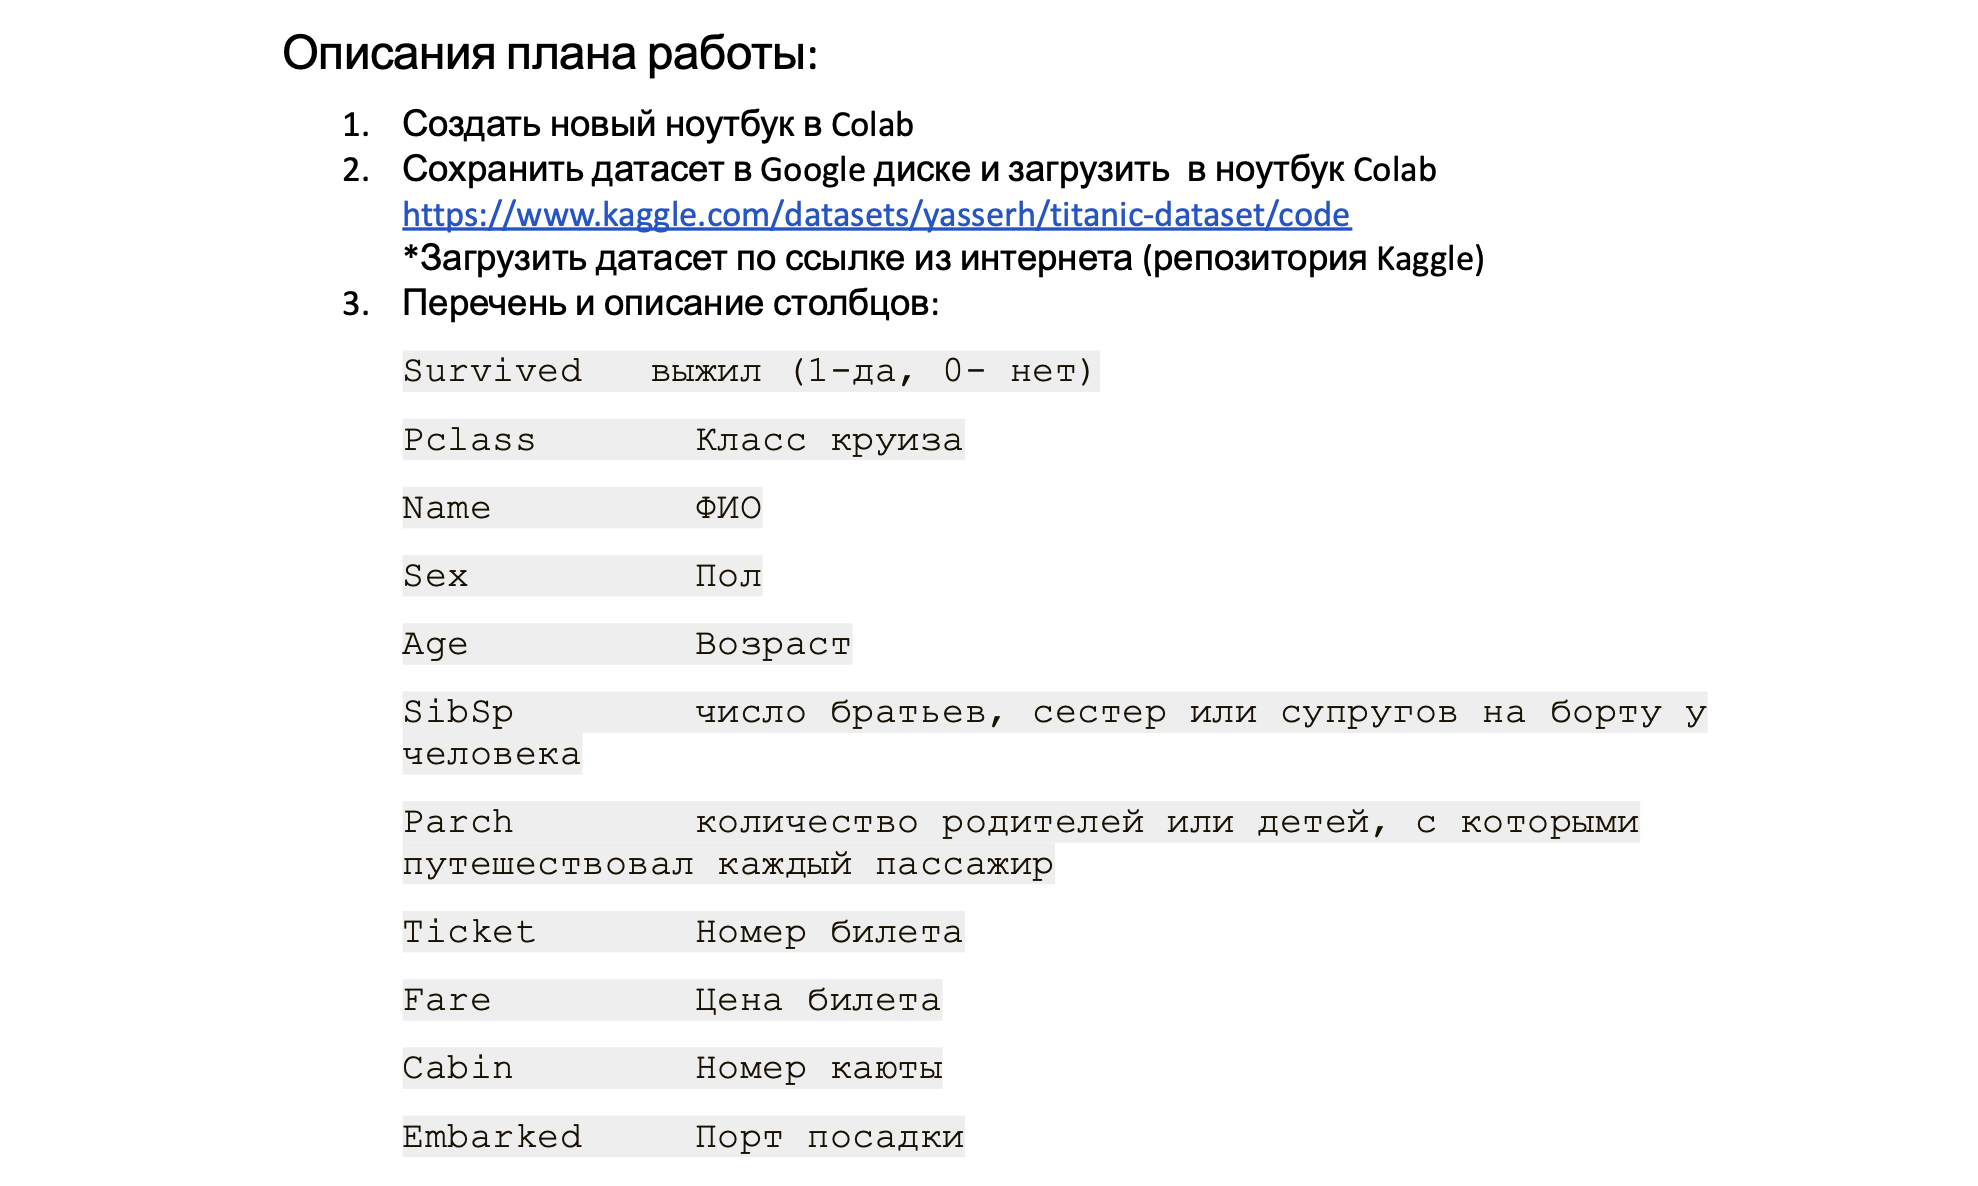

In [217]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/Users/a.l.nikitin/Documents/ArchitectureAI/Titanic-Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


![Снимок экрана 2023-07-20 в 10.02.51.png](<attachment:Снимок экрана 2023-07-20 в 10.02.51.png>)
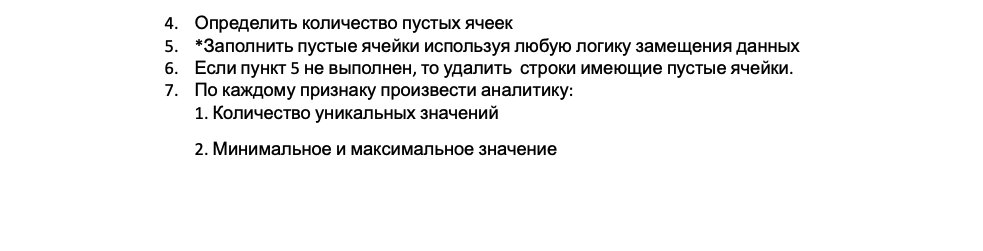

# 4. Количество пустых ячеек по столбцам:

In [218]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 5. Заполняем пустые ячейки

In [219]:
# Номер каюты заменим значениями класса каюты
df["Cabin"] = df["Cabin"].fillna(df["Pclass"])

# Место посадки заменяем на значение соседа сверху
df["Embarked"].fillna(method="ffill", inplace=True)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,3,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,3,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,3,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,3,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,2,C


In [220]:
## Осталось заполнить столбец возраста
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [221]:
# У дам возраст спрашивать неприлично, проверим информацию о ком именно мы не знаем
df.loc[df["Age"].isnull()]["Sex"].value_counts()

Sex
male      124
female     53
Name: count, dtype: int64

In [222]:
# считаем отдельно средний возраст мужчин и женщин
male_mean = (df.loc[df["Sex"] == "male"])["Age"].dropna().mean()
male_mean = round(male_mean)
male_mean

31

In [223]:
female_mean = (df.loc[df["Sex"] == "female"])["Age"].dropna().mean()
female_mean = round(female_mean)
female_mean


28

In [224]:
# заполняем пустые зеачения для мужчин и женщин
df["Age"] = df["Age"].fillna(df["Sex"].map({"male":male_mean, "female" : female_mean}))
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 7.1. Количество уникальных значений

In [225]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          150
Embarked         3
dtype: int64

# 7.2. Максимальные и минимальное значение

In [226]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.779091,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.017438,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 8.1. Определим корреляцию признаков 

<Axes: >

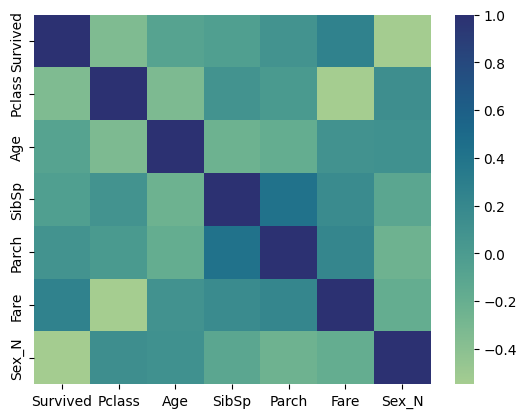

In [230]:

# Пол поменяем на числа, теперь 1 - мужчины, 0 - женщины
df["Sex_N"] = df["Sex"].map({"male":1, "female":0})

# Убираем лишние столбцы, так как они не числовые, а идентификатор нам не дает реального представления о человеке
df = df.drop(columns=["Name", "Ticket", "Cabin", "Embarked", "Sex", "PassengerId"])


# Общая кореляция признаков
corr = df.corr()
sns.heatmap(corr,cmap="crest")

In [233]:
# Численная кореляция всех признаков с признаком "Survived"
corr = df.corr()["Survived"]
corr

Survived    1.000000
Pclass     -0.338481
Age        -0.081736
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Sex_N      -0.543351
Name: Survived, dtype: float64

# 8.2. Из библиотеки scikit-learn, используем RandomForestClassifier который предоставляет атрибут feature_importances_, для определения вклада каждого признака в предсказание целевого признака

In [232]:
from sklearn.ensemble import RandomForestClassifier

x = df.drop('Survived', axis=1)
y = df['Survived']

# Создание модели случайного леса
model = RandomForestClassifier()

# Обучение модели и оценка важности признаков
model.fit(x, y)
importanse = model.feature_importances_

# Вывод важности признаков
for column, importanse in zip(x.columns, importanse):
    print(column, ':', importanse)

Pclass : 0.08640845007000822
Age : 0.26289692211153187
SibSp : 0.047724108138143984
Parch : 0.037920953920615064
Fare : 0.2957122126064706
Sex_N : 0.26933735315323026
